<a href="https://colab.research.google.com/github/ErzAaaa/Indonesian-Reading-Interest---AI-Analyze/blob/main/indonesian_reading_interest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

# Load the dataset (specifying semicolon delimiter)
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]), sep=';')

df.head()

Saving TGM 2020-2023_eng.csv to TGM 2020-2023_eng.csv


,Provinsi,Year,Reading Frequency per week,Number of Readings per Quarter,Daily Reading Duration (in minutes),Internet Access Frequency per Week,Daily Internet Duration (in minutes),Tingkat Kegemaran Membaca (Reading Interest),Category
0,Aceh,2020,4,2,95,NaN,NaN,"54,68",Moderate
1,Aceh,2021,"5,5","4,5",103,5,"83,9","64,13",High
2,Aceh,2022,5,"5,5","94,3","5,5","123,4","65,85",High
3,Aceh,2023,5,"5,5",95,"5,5",104,"66,64",Moderate
4,Bali,2020,4,"2,5",91,NaN,NaN,"56,98",Moderate


In [2]:
import numpy as np

numeric_cols = [
    'Reading Frequency per week',
    'Number of Readings per Quarter',
    'Daily Reading Duration (in minutes)',
    'Internet Access Frequency per Week',
    'Daily Internet Duration (in minutes)',
    'Tingkat Kegemaran Membaca (Reading Interest)'
]

# 2. Data Cleaning
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(',', '.')
    df[col] = pd.to_numeric(df[col], errors='coerce')

df_ml = df.dropna()

print(f"Data ready for ML. Training on {len(df_ml)} samples.")

Data ready for ML. Training on 105 samples.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

# Input : Kebiasaan Membaca dan Internet
X = df_ml[[
    'Reading Frequency per week',
    'Number of Readings per Quarter',
    'Daily Reading Duration (in minutes)',
    'Internet Access Frequency per Week',
    'Daily Internet Duration (in minutes)'
]]

# Regressi
y_score = df_ml['Tingkat Kegemaran Membaca (Reading Interest)']

# Klasifikasi
y_category = df_ml['Category']

# Training (80%) and Testing (20%) sets
X_train, X_test, y_train_score, y_test_score = train_test_split(X, y_score, test_size=0.2, random_state=42)
_, _, y_train_cat, y_test_cat = train_test_split(X, y_category, test_size=0.2, random_state=42)

# MODEL 1: Linear Regression (Prediksi Skor) ---
reg_model = LinearRegression()
reg_model.fit(X_train, y_train_score)
y_pred_score = reg_model.predict(X_test)

print("=== Model 1: Regression (Predicting Score) ===")
print(f"Accuracy (R2 Score): {r2_score(y_test_score, y_pred_score):.2f}")
print("This score (0-1) shows how well the model learned the TGM formula.\n")

# MODEL 2: Random Forest (Prediksi Kategori) ---
clf_model = RandomForestClassifier(n_estimators=300, random_state=10)
clf_model.fit(X_train, y_train_cat)
y_pred_cat = clf_model.predict(X_test)

print("=== Model 2: Classification (Predicting Category) ===")
print(f"Accuracy: {accuracy_score(y_test_cat, y_pred_cat):.2f}")
print("\nClassification Report:")
print(classification_report(y_test_cat, y_pred_cat))

=== Model 1: Regression (Predicting Score) ===
Accuracy (R2 Score): 0.94
This score (0-1) shows how well the model learned the TGM formula.

=== Model 2: Classification (Predicting Category) ===
Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

        High       0.71      0.62      0.67         8
    Moderate       0.79      0.85      0.81        13

    accuracy                           0.76        21
   macro avg       0.75      0.74      0.74        21
weighted avg       0.76      0.76      0.76        21



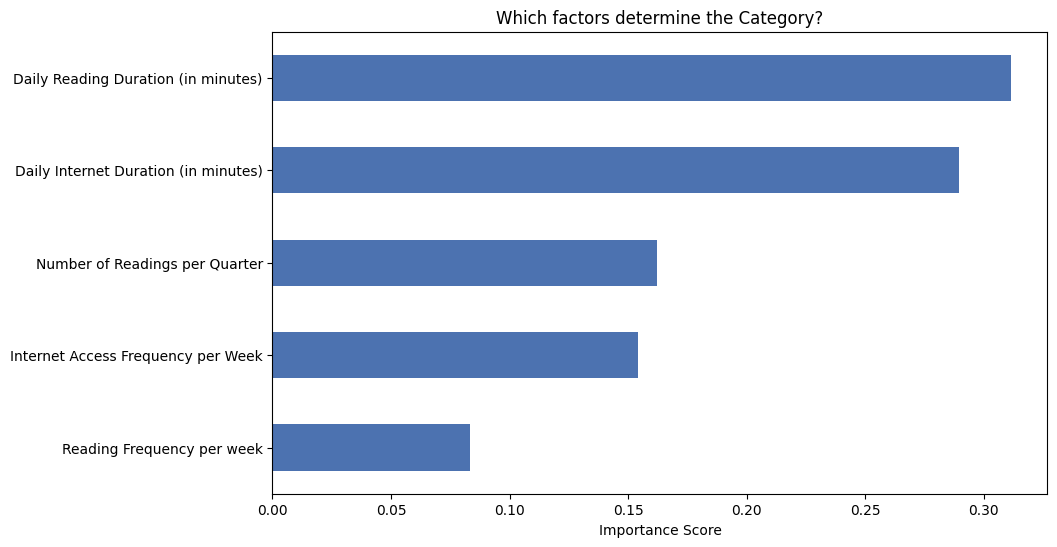

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Dapatkan nama fitur dan skor kepentingannya dari model Random Forest
feature_importances = pd.Series(clf_model.feature_importances_, index=X.columns)

# Plot
plt.figure(figsize=(10, 6))
feature_importances.sort_values().plot(kind='barh', color='#4c72b0')
plt.title('Which factors determine the Category?')
plt.xlabel('Importance Score')
plt.show()

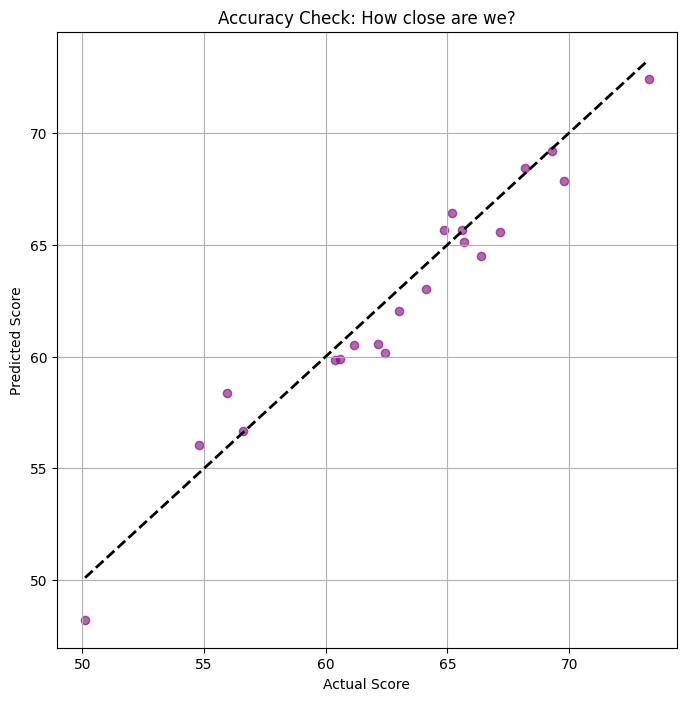

In [5]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test_score, y_pred_score, color='purple', alpha=0.6)

# Garis Prediksi
plt.plot([y_test_score.min(), y_test_score.max()],
         [y_test_score.min(), y_test_score.max()],
         'k--', lw=2)

plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Accuracy Check: How close are we?')
plt.grid(True)
plt.show()

<Figure size 1600x800 with 0 Axes>

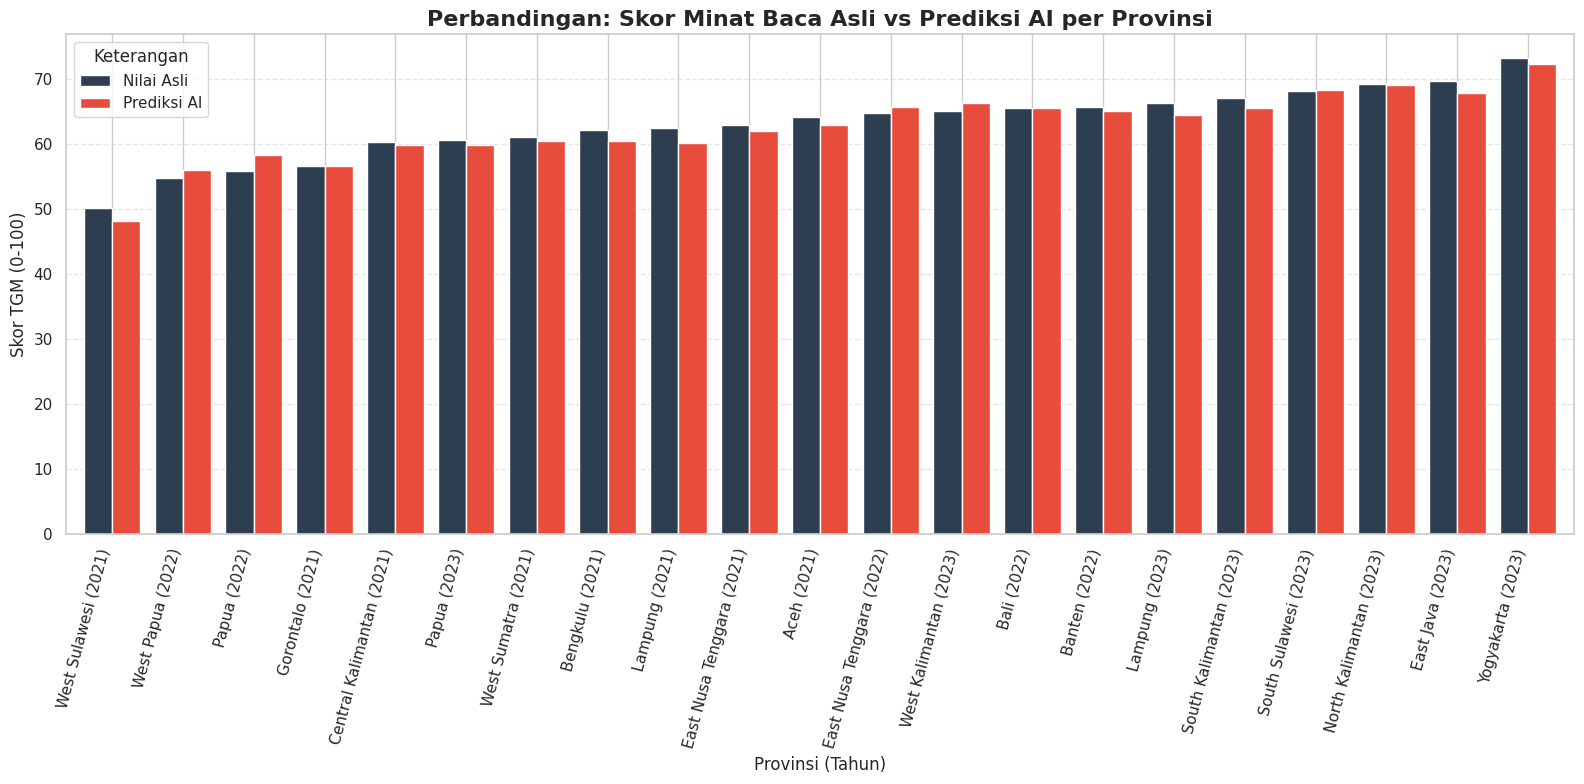

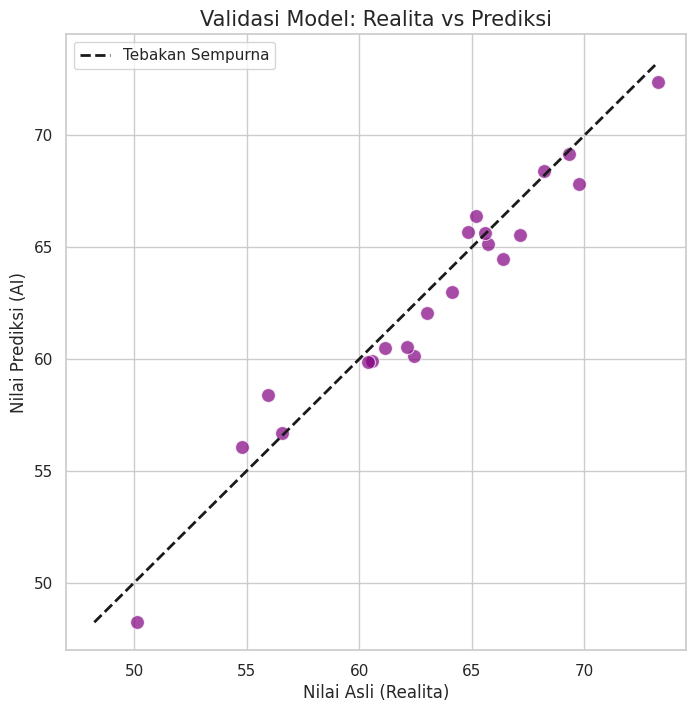

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Mengatur gaya visual agar lebih cantik
sns.set(style="whitegrid")

# --- DATA PREPARATION ---
# Get the original 'Provinsi' and 'Year' for the test set indices from df_ml
provinsi_year_test = df_ml.loc[y_test_score.index, ['Provinsi', 'Year']]

# Combine 'Provinsi' and 'Year' to ensure unique labels for plotting
hasil_detail = pd.DataFrame({
    'Provinsi': provinsi_year_test['Provinsi'] + ' (' + provinsi_year_test['Year'].astype(str) + ')',
    'Nilai Asli': y_test_score,
    'Prediksi AI': y_pred_score
})

# Kita urutkan data berdasarkan Nilai Asli dari terkecil ke terbesar agar grafik rapi
data_grafik = hasil_detail.sort_values(by='Nilai Asli')

# Set 'Provinsi' sebagai index agar otomatis jadi label di bawah batang untuk bar chart
data_plot = data_grafik.set_index('Provinsi')[['Nilai Asli', 'Prediksi AI']]

# --- DIAGRAM 1: PERBANDINGAN ASLI VS PREDIKSI PER PROVINSI (Grouped Bar Chart) ---
plt.figure(figsize=(16, 8)) # Adjusted figure size for better readability

# Plot(kind='bar') will automatically create grouped bars
data_plot.plot(kind='bar', figsize=(16, 8), color=['#2c3e50', '#e74c3c'], width=0.8)

plt.title('Perbandingan: Skor Minat Baca Asli vs Prediksi AI per Provinsi', fontsize=16, fontweight='bold')
plt.ylabel('Skor TGM (0-100)', fontsize=12)
plt.xlabel('Provinsi (Tahun)', fontsize=12)

# Menambah garis bantu tipis di belakang
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Memutar nama provinsi agar miring (supaya tidak bertumpuk)
plt.xticks(rotation=75, ha='right') # Increased rotation for potentially longer labels
plt.legend(loc='upper left', title='Keterangan')

plt.tight_layout() # Agar tulisan tidak terpotong saat disimpan

# Simpan gambar agar bisa didownload
plt.savefig('grafik_perbandingan_provinsi_barchart.png')
plt.show()

# --- DIAGRAM 2: SEBERAPA DEKAT TEBAKAN AI? (SCATTER PLOT) ---
plt.figure(figsize=(8, 8))

# Titik-titik data
sns.scatterplot(x='Nilai Asli', y='Prediksi AI', data=hasil_detail, color='purple', s=100, alpha=0.7)

# Garis Diagonal (Garis Sempurna)
# Jika titik berada tepat di garis putus-putus ini, berarti tebakan 100% benar
min_val = min(hasil_detail['Nilai Asli'].min(), hasil_detail['Prediksi AI'].min())
max_val = max(hasil_detail['Nilai Asli'].max(), hasil_detail['Prediksi AI'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Tebakan Sempurna')

plt.title('Validasi Model: Realita vs Prediksi', fontsize=15)
plt.xlabel('Nilai Asli (Realita)', fontsize=12)
plt.ylabel('Nilai Prediksi (AI)', fontsize=12)
plt.legend()
plt.grid(True)

plt.savefig('grafik_scatter_validasi.png')
plt.show()

In [7]:
import pandas as pd

# Membuat hipotetis skenario
# [Frekuensi Membaca, Bacaan/Kuartal, Durasi(menit), Frekuensi Internet, Durasi Internet(menit)]
new_data = pd.DataFrame([[3.0, 2.0, 60, 7.0, 150]], columns=X.columns)

print("--- Hypothetical Scenario ---")
print(f"Inputs:\n{new_data}")

# Prediksi Score
predicted_score = reg_model.predict(new_data)[0]
print(f"\nPredicted TGM Score: {predicted_score:.2f}")

# Prediksi Kategori
predicted_category = clf_model.predict(new_data)[0]
print(f"Predicted Category: {predicted_category}")

--- Hypothetical Scenario ---
Inputs:
   Reading Frequency per week  Number of Readings per Quarter  \
0                         3.0                             2.0   

   Daily Reading Duration (in minutes)  Internet Access Frequency per Week  \
0                                   60                                 7.0   

   Daily Internet Duration (in minutes)  
0                                   150  

Predicted TGM Score: 42.99
Predicted Category: Moderate
